In [1]:
import pandas as pd
#caminho onde está o arquivo python sempre barra para direita
c = '/content/drive/MyDrive/res/database/data/AC/DNAC2017.csv'

sinasc = pd.read_csv(c, dtype=str)

sinasc

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2515768,110010,1,22,1,4,NaN,02,02,120040,6,1,2,2,17052017,1344,2,09,10,4,4085,2,25052017,NaN,20170006,3.2.01,05062017,019,NaN,812,120070,12,3,3,26081994,4,04,03,01,42,25072016,42,8,01,04,1,2,2,1,2,3,17052017,06,0,1,NaN,05,1,2
1,2,1,2516047,110018,1,30,2,5,NaN,01,NaN,120020,5,1,2,3,27042017,1750,2,09,10,4,3460,2,04052017,NaN,20170005,3.2.01,05052017,008,NaN,811,110018,11,5,NaN,11031987,4,01,NaN,01,28,16072016,40,8,05,03,1,2,2,1,5,4,27042017,08,0,1,NaN,05,1,3
2,3,1,5618347,110020,1,26,2,4,999992,03,00,120001,5,1,1,3,03012017,1830,2,08,09,4,3690,2,16012017,NaN,20170002,3.2.01,03022017,031,NaN,813,130240,13,3,3,05051990,4,03,03,00,NaN,05042016,38,8,06,05,1,2,3,1,2,4,03012017,06,0,1,NaN,03,1,2
3,4,1,5618347,110020,1,28,2,4,999992,00,00,120001,5,1,2,4,13022017,2025,2,08,09,4,2925,2,13032017,NaN,20170004,3.2.01,06042017,052,NaN,835,353440,35,2,8,08041988,4,00,00,00,22,15052016,38,8,07,02,1,1,2,1,2,4,18022017,04,0,1,NaN,02,0,5
4,5,1,5618347,110020,1,22,2,3,622020,01,00,120040,5,1,1,3,10032017,0315,1,08,09,4,3720,2,23032017,NaN,20170004,3.2.01,06042017,027,NaN,812,120040,12,2,7,03091994,4,01,01,00,28,02062016,40,8,06,04,1,2,3,1,2,3,11032017,03,0,1,NaN,03,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16353,16354,1,2012499,130070,1,38,1,2,NaN,11,00,120040,6,1,1,3,27102017,0300,1,08,09,4,2855,2,09122017,NaN,20170022,3.2.01,10122017,044,NaN,812,120040,12,1,1,06041979,4,11,11,00,NaN,07012017,42,8,05,05,1,2,3,2,5,0,27102017,01,0,1,NaN,03,1,2
16354,16355,1,2151871,317020,1,29,2,5,354705,01,00,120040,5,1,2,4,14102017,0757,1,09,10,1,4530,2,19102017,NaN,20170022,3.2.01,31102017,017,NaN,831,313420,31,5,NaN,11101988,1,01,00,01,36,NaN,39,2,12,01,1,2,1,1,2,3,14102017,08,0,1,NaN,05,1,5
16355,16356,1,2078791,354340,1,26,1,5,223115,01,00,120040,5,1,2,4,10102017,0627,2,10,10,1,3530,2,07112017,NaN,20170022,3.2.01,16112017,037,NaN,852,520870,52,5,NaN,16051991,1,01,00,01,33,NaN,38,2,10,01,1,2,2,1,1,2,10102017,08,0,1,NaN,05,1,5
16356,16357,1,0010537,530010,1,30,1,5,NaN,00,00,120040,5,1,2,4,26092017,0809,2,08,09,NaN,3350,2,05102017,NaN,20170049,3.2.01,17102017,021,NaN,812,120020,12,5,NaN,15071987,NaN,00,00,00,NaN,24122016,39,8,07,02,1,2,2,1,5,4,26092017,08,0,1,NaN,01,0,5


In [2]:
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())
sinasc.PESO = pd.to_numeric(sinasc.PESO).astype(pd.Int64Dtype())

sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())

In [3]:
esc1 = sinasc[(sinasc.ESCMAE == '1') & (sinasc.LOCNASC == '4') & (sinasc.PARTO.notna())][['IDADEMAE']]
esc1.transpose()

,73,1700,1701,2085,2464,7223,10376,10486,10490,10701,10745
IDADEMAE,31,29,34,18,26,37,18,35,20,34,15


In [4]:
esc2 = sinasc[(sinasc.ESCMAE == '2') & (sinasc.LOCNASC == '4')][['IDADEMAE']]
esc2.transpose()

,71,2059,2083,2086,7988,10315,10378,10379,10495,10743,15371
IDADEMAE,27,26,23,31,33,16,24,25,31,31,29


In [5]:
#média da amostra
print(esc1.mean())
print(esc2.mean())

IDADEMAE    27.0
dtype: float64
IDADEMAE    26.909091
dtype: float64


In [6]:
#
dm1 = esc1.mad()
dm2 = esc2.mad()
print(dm1)
print(dm2)

IDADEMAE    6.909091
dtype: float64
IDADEMAE    3.735537
dtype: float64


In [7]:
#variança grau de liberdade 0
var_pop_1 = esc1.var(ddof=0)
var_pop_2 = esc2.var(ddof=0)
print(var_pop_1)
print(var_pop_2)

IDADEMAE    58.0
dtype: float64
IDADEMAE    21.719008
dtype: float64


In [8]:
sinasc.var(ddof=0)

IDADEMAE          48.062546
QTDFILVIVO         3.951033
QTDFILMORT         0.447681
APGAR1             1.071134
APGAR5             0.618185
PESO          295762.010315
DTRECORIGA              NaN
SERIESCMAE         5.733773
QTDGESTANT         4.369691
QTDPARTNOR         4.680027
QTDPARTCES         0.890621
IDADEPAI          74.644493
SEMAGESTAC         6.669879
CONSPRENAT        13.025434
CODPAISRES              NaN
dtype: float64

In [9]:
#desvio padrão
dp_pop_1 = esc1.std(ddof=0)
dp_pop_2 = esc2.std(ddof=0)
print(dp_pop_1)
print(dp_pop_2)

IDADEMAE    7.615773
dtype: float64
IDADEMAE    4.660366
dtype: float64


In [10]:
#variação entre quartis de 25 a 50 por cento
q_esc1 = esc1.quantile([0.25, 0.75]).values
q_esc2 = esc2.quantile([0.25, 0.75]).values
print(q_esc1)
print(q_esc2)

[[19.0]
 [34.0]]
[[24.5]
 [31.0]]


In [11]:
#disribuição de frequencia

In [12]:
#preparação dos dados 
sinasc.IDADEMAE.value_counts()

20    961
19    956
18    932
21    913
23    848
22    844
17    834
24    772
26    733
25    714
28    675
27    674
16    661
30    606
29    570
31    559
32    523
15    484
33    479
34    457
35    406
36    319
37    298
38    253
14    204
39    184
41    126
40    124
13     66
42     60
43     44
44     25
45     11
12      9
46      9
47      5
49      2
48      2
51      1
52      1
11      1
54      1
Name: IDADEMAE, dtype: Int64

In [13]:
faixas = pd.cut(sinasc.IDADEMAE,[0, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69])
faixas

0        (19, 24]
1        (29, 34]
2        (24, 29]
3        (24, 29]
4        (19, 24]
           ...   
16353    (34, 39]
16354    (24, 29]
16355    (24, 29]
16356    (29, 34]
16357    (34, 39]
Name: IDADEMAE, Length: 16358, dtype: category
Categories (13, interval[int64]): [(0, 9] < (9, 14] < (14, 19] < (19, 24] ... (49, 54] < (54, 59] <
                                   (59, 64] < (64, 69]]

In [14]:
faixa_etaria =sinasc['IDADEMAE'].groupby(faixas)
faixa_etaria

In [15]:
#frequencia absoluta
freq_abs = faixa_etaria.agg(['count'])
freq_abs.T

IDADEMAE,"(0, 9]","(9, 14]","(14, 19]","(19, 24]","(24, 29]","(29, 34]","(34, 39]","(39, 44]","(44, 49]","(49, 54]","(54, 59]","(59, 64]","(64, 69]"
count,0,280,3867,4338,3366,2624,1460,379,29,3,0,0,0


In [16]:
#frequencia relativa
fr = lambda x : x.count()/sinasc["IDADEMAE"].count()
freq_relativa = faixa_etaria.agg([fr])
freq_relativa.T

IDADEMAE,"(0, 9]","(9, 14]","(14, 19]","(19, 24]","(24, 29]","(29, 34]","(34, 39]","(39, 44]","(44, 49]","(49, 54]","(54, 59]","(59, 64]","(64, 69]"
<lambda>,0.0,0.01713,0.236572,0.265386,0.205922,0.160529,0.089318,0.023186,0.001774,0.000184,0.0,0.0,0.0


In [17]:
#frequencia percentual
fp = lambda x : x.count()*100/sinasc.IDADEMAE.count()

freq_percentual = faixa_etaria.agg([fp])
freq_percentual.T

IDADEMAE,"(0, 9]","(9, 14]","(14, 19]","(19, 24]","(24, 29]","(29, 34]","(34, 39]","(39, 44]","(44, 49]","(49, 54]","(54, 59]","(59, 64]","(64, 69]"
<lambda>,0.0,1.712957,23.657164,26.538603,20.592194,16.052857,8.931849,2.31861,0.177413,0.018353,0.0,0.0,0.0


In [18]:
#soma acumulada
freq_abs_acum = faixa_etaria.count().cumsum()
freq_abs_acum

IDADEMAE
(0, 9]          0
(9, 14]       280
(14, 19]     4147
(19, 24]     8485
(24, 29]    11851
(29, 34]    14475
(34, 39]    15935
(39, 44]    16314
(44, 49]    16343
(49, 54]    16346
(54, 59]    16346
(59, 64]    16346
(64, 69]    16346
Name: IDADEMAE, dtype: int64

In [19]:
#frquencia relativa acumulada
freq_rel_acum = freq_abs_acum.count()/sinasc["IDADEMAE"].count()
freq_rel_acum

0.000795301602838615

In [20]:
freq_perc_acum = freq_rel_acum*100
freq_perc_acum


0.07953016028386149

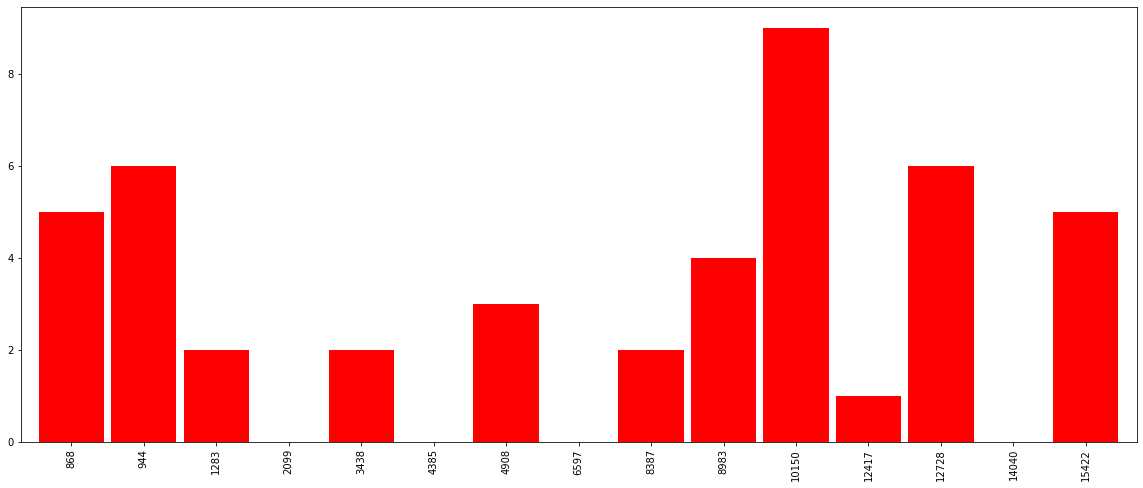

In [21]:
import matplotlib.pyplot as plt
filhos_vivos = sinasc[sinasc.ESTCIVMAE =='3']['QTDFILVIVO']

bar = filhos_vivos.plot(kind='bar', figsize=(20, 8), width=0.9, color='red')

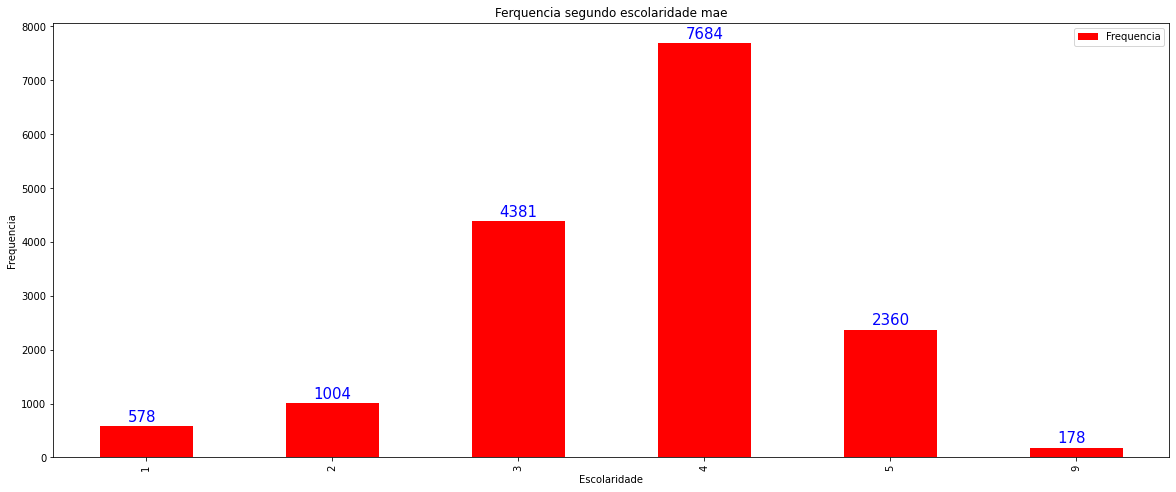

In [22]:
grupo = sinasc.groupby(by='ESCMAE').count()
barras = grupo[['contador']].plot(kind='bar', figsize = (20,8), color='red', title='Ferquencia segundo escolaridade mae')
barras.set(xlabel='Escolaridade', ylabel='Frequencia')
barras.legend(['Frequencia'])

for i in barras.patches:
  barras.text(i.get_x()+0.15, i.get_height()+100, i.get_height(), fontsize=15, color='blue')

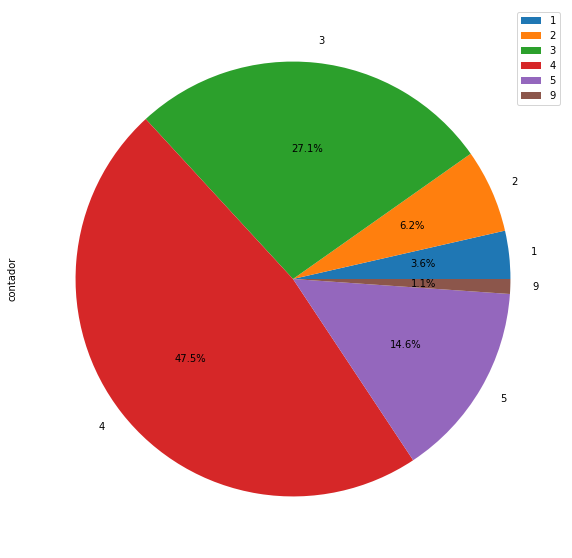

In [23]:
grupo = sinasc.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(kind='pie', y='contador', figsize=(25, 10), autopct='%1.1f%%')

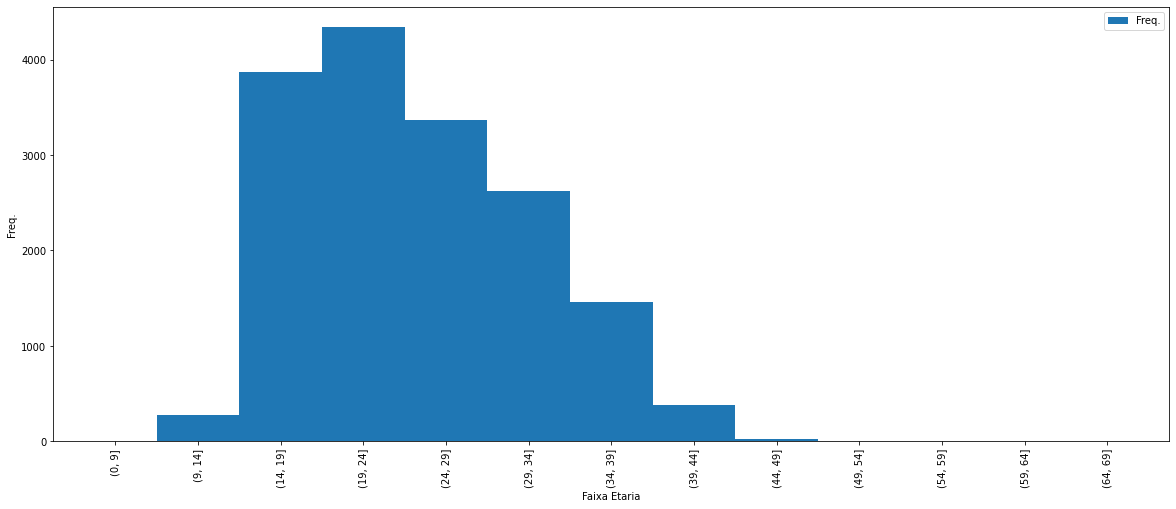

In [24]:
hist = freq_abs.plot(kind='bar', width=1, figsize=(20,8))
hist.set(xlabel='Faixa Etaria', ylabel='Freq.')
hist.legend(['Freq.'])

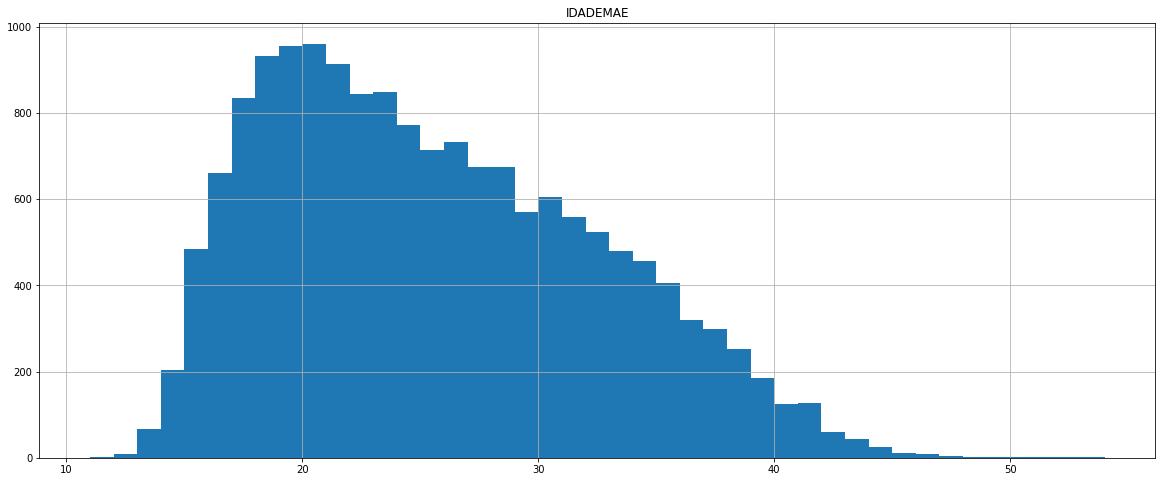

In [25]:
bins_values = sinasc.IDADEMAE.value_counts(sort=False)
hist = sinasc.hist(column="IDADEMAE", bins= sorted(bins_values.keys()), figsize=(20,8))

In [26]:
grupo = sinasc.groupby(by='IDADEMAE').count().reset_index()
grupo.IDADEMAE

0     11
1     12
2     13
3     14
4     15
5     16
6     17
7     18
8     19
9     20
10    21
11    22
12    23
13    24
14    25
15    26
16    27
17    28
18    29
19    30
20    31
21    32
22    33
23    34
24    35
25    36
26    37
27    38
28    39
29    40
30    41
31    42
32    43
33    44
34    45
35    46
36    47
37    48
38    49
39    51
40    52
41    54
Name: IDADEMAE, dtype: int64

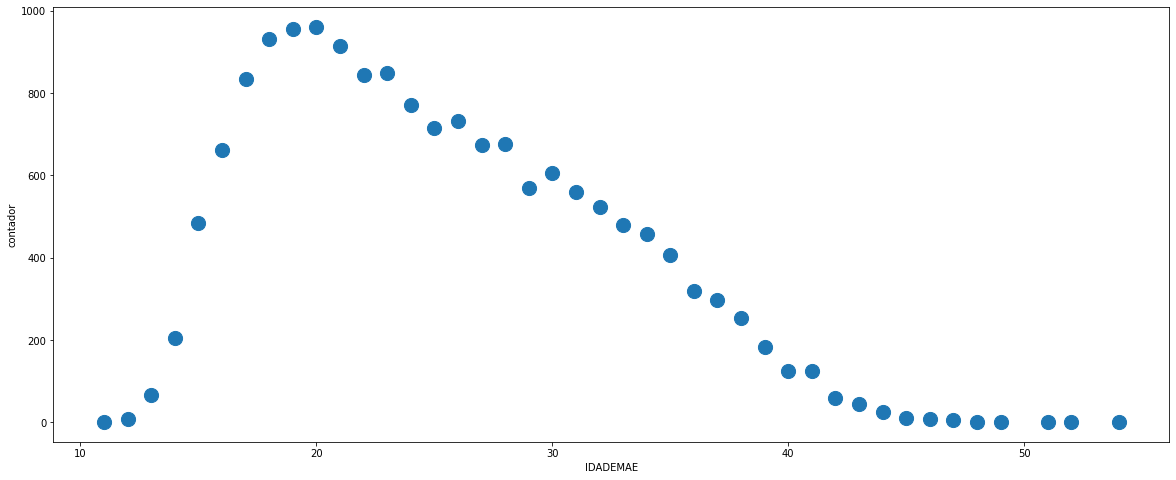

In [27]:
grupo = sinasc.groupby(by='IDADEMAE').count().reset_index()
disp = grupo.plot(kind='scatter', x='IDADEMAE', y='contador', figsize=(20,8), s=200)

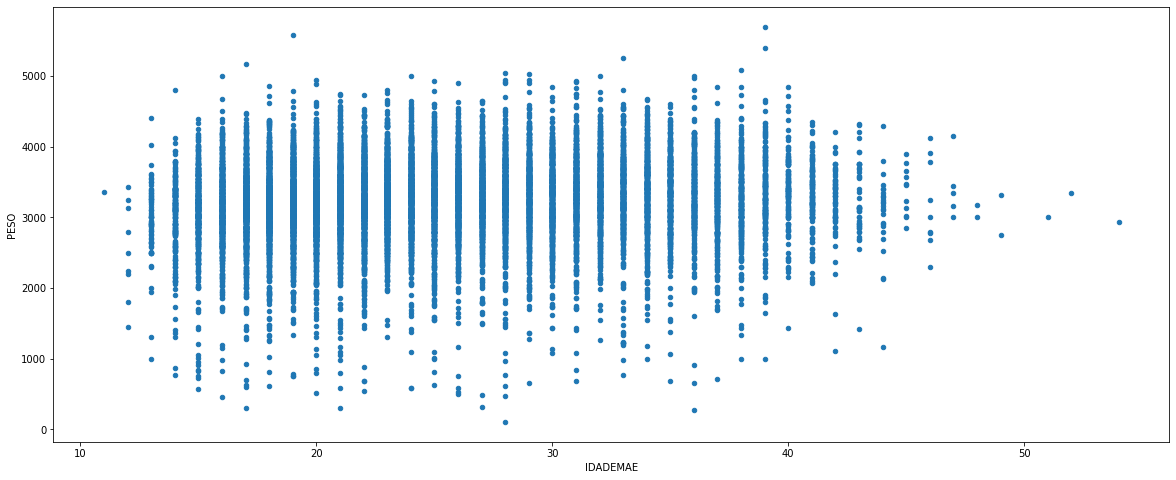

In [28]:
idade = sinasc[['IDADEMAE', 'PESO']].dropna()
disp = idade.plot(kind='scatter', x='IDADEMAE', y='PESO', figsize=(20,8))

In [29]:
#AMOSTRAGEM

In [30]:
import random
random.seed(88)

N = len(sinasc)
n = 1000
#range (0, N-1): [0,1,2,......N-1]
idx = random.sample(range(0, N), n)

sinasc.iloc[idx,:]

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
6512,6513,1,2000733,120040,1,19,5,4,999992,<NA>,<NA>,120040,5,1,2,4,01062017,1956,1,8,9,4,3390,2,21062017,NaN,20170011,3.2.01,30062017,029,NaN,812,120033,12,3,<NA>,04071997,4,<NA>,<NA>,<NA>,<NA>,NaN,40,9,10,NaN,NaN,NaN,2,1,5,4,02062017,12,0,1,NaN,11,0,9
15953,15954,1,2000121,120060,1,17,5,3,999991,0,0,120060,5,1,1,4,21092017,2320,2,9,10,4,3250,2,22092017,NaN,20170015,3.2.01,29092017,008,NaN,812,120060,12,2,<NA>,29032000,4,0,0,0,<NA>,29122016,37,8,7,03,1,1,3,1,5,4,21092017,11,0,1,NaN,02,0,5
3104,3105,1,2000733,120040,1,37,5,2,999992,5,0,120080,4,1,1,3,20012017,1048,1,8,9,4,3360,2,06022017,NaN,20170003,3.2.01,24022017,035,NaN,812,120040,12,1,2,17041979,4,5,5,0,<NA>,16052016,35,8,6,07,9,2,3,1,2,4,20012017,01,0,1,NaN,11,1,2
5452,5453,1,2000733,120040,1,25,5,4,622020,2,1,120050,4,1,2,3,23042017,1055,1,9,10,4,3785,2,15052017,NaN,20170008,3.2.01,01062017,039,NaN,813,130070,13,2,8,17041992,4,1,1,1,27,08082016,36,8,6,NaN,NaN,NaN,2,1,5,4,23042017,04,0,1,NaN,11,1,9
14785,14786,1,2002078,120040,1,24,5,4,999992,<NA>,<NA>,120040,5,1,1,3,05122017,1639,2,9,10,4,2540,2,19122017,NaN,20170023,3.2.01,28122017,023,NaN,812,120040,12,3,<NA>,25051993,4,<NA>,<NA>,<NA>,23,14032017,38,8,6,08,1,2,3,2,2,3,05122017,12,0,1,NaN,01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,4027,1,2000733,120040,1,30,2,4,999992,2,<NA>,120040,5,1,1,4,28022017,1018,1,8,9,4,4270,2,20032017,NaN,20170005,3.2.01,03042017,034,NaN,813,130165,13,3,<NA>,24121986,4,1,1,<NA>,24,NaN,40,9,7,NaN,1,2,3,1,5,4,28022017,12,0,1,NaN,03,1,9
10093,10094,1,2000296,120020,1,24,5,5,NaN,0,0,120020,5,1,1,4,28122017,2221,2,9,10,4,2600,2,17012018,NaN,20180001,3.2.01,18012018,021,NaN,812,120039,12,5,<NA>,24031993,4,0,0,0,<NA>,25032017,40,8,13,03,1,2,3,2,2,4,28122017,08,0,1,NaN,01,0,5
11826,11827,1,2000733,120040,1,22,5,3,999992,3,0,120001,5,1,2,2,07082017,0934,1,8,8,4,3630,2,28082017,NaN,20170015,3.2.01,01092017,025,NaN,811,110000,11,2,6,08121994,4,3,0,3,<NA>,22102016,41,8,3,01,9,2,9,1,2,4,07082017,03,0,1,NaN,11,1,3
723,724,1,2000296,120020,1,26,2,4,999992,0,0,120020,3,1,2,3,08022017,1400,2,9,9,NaN,2500,2,28022019,NaN,20190004,3.2.01,28022019,750,NaN,812,120020,12,3,3,08041990,NaN,0,0,0,<NA>,15072016,29,8,4,01,1,2,2,1,2,4,08022017,06,0,1,NaN,10,0,3


In [31]:
n = 1000
sinasc.sample(n=n, random_state=88)

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
14137,14138,1,2000733,120040,1,19,1,3,622020,2,<NA>,120040,5,1,2,3,11112017,2340,1,8,9,4,2794,2,30112017,NaN,20170021,3.2.01,27122017,046,NaN,812,120040,12,2,<NA>,15011998,4,1,<NA>,1,<NA>,05022017,40,8,5,NaN,9,2,2,1,5,4,12112017,11,0,1,NaN,11,1,9
7888,7889,1,2000121,120060,1,36,2,2,999992,8,0,120060,4,1,1,3,25032017,2113,1,8,9,4,3100,2,27032017,NaN,20170006,3.2.01,30032017,005,NaN,813,130150,13,1,1,18071980,4,8,8,0,<NA>,16072016,36,8,5,03,1,2,3,1,2,3,25032017,01,0,1,NaN,10,1,3
5594,5595,1,2002078,120040,1,18,1,4,999991,0,0,120040,6,1,1,4,27042017,1244,1,9,10,4,3140,2,19052017,NaN,20170009,3.2.01,01062017,035,NaN,812,120070,12,3,3,12101998,4,0,0,0,<NA>,05072016,42,8,7,05,1,9,3,2,2,3,27042017,06,0,1,NaN,01,0,2
2635,2636,1,2002078,120040,1,20,5,5,NaN,0,0,120040,4,1,1,4,04012017,1715,2,9,10,NaN,3140,2,17012017,NaN,20170002,3.2.01,01022017,028,NaN,812,120040,12,4,<NA>,11031996,NaN,0,0,0,<NA>,30042016,35,8,8,03,1,2,3,2,2,3,05012017,07,0,1,NaN,10,0,5
2067,2068,1,2000636,120030,1,18,5,NaN,NaN,0,0,120030,4,1,1,3,26062017,1730,2,8,10,4,3150,2,13072017,NaN,20170011,3.2.01,17072017,021,NaN,812,120030,12,NaN,<NA>,01081998,4,0,0,0,<NA>,16102016,36,8,4,04,1,2,3,1,5,4,26062017,NaN,0,1,NaN,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12479,12480,1,2000733,120040,1,17,1,3,999992,<NA>,1,120080,5,1,2,3,05092017,1152,1,8,9,4,3360,2,27092017,NaN,20170017,3.2.01,29092017,024,NaN,813,130070,13,2,7,10012000,4,<NA>,<NA>,<NA>,<NA>,23112016,40,8,5,NaN,9,2,2,1,5,4,05092017,03,0,1,NaN,11,1,9
15976,15977,1,2000121,120060,1,32,5,1,999992,7,0,120060,5,1,1,2,27092017,0445,1,9,10,5,2900,2,28092017,NaN,20170015,3.2.01,29092017,002,NaN,812,120032,12,0,<NA>,23041985,5,7,7,0,<NA>,05012017,38,8,3,05,1,2,3,1,5,4,27092017,00,0,1,NaN,03,1,2
905,906,1,2000296,120020,1,20,1,4,999992,0,0,120042,5,1,2,3,19032017,1940,1,8,9,NaN,3070,2,28022019,NaN,20190004,3.2.01,28022019,711,NaN,812,120042,12,3,3,25101996,NaN,0,0,0,<NA>,09062016,40,8,6,03,1,2,2,1,2,4,19032017,06,0,1,NaN,01,0,4
11412,11413,1,2000733,120040,1,26,5,4,999992,3,1,120040,4,1,1,2,23072017,1613,2,8,8,4,2145,2,14082017,NaN,20170014,3.2.01,17082017,025,NaN,812,120010,12,3,<NA>,19051991,4,4,4,0,<NA>,05122016,33,8,3,04,9,2,3,2,2,4,24072017,12,0,1,NaN,11,1,2


In [32]:
#Amostragaem sistematica

import random
import numpy as np

random.seed(88)
N = len(sinasc)
n = 100

#intervalo população / amostra (N/n)
R = N//n

#aleatoriedade inicial
i = random.randint(0, R-1)
idx = np.arange(i, N-1, R)
idx
sinasc.iloc[idx,:]

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
101,102,1,2001500,120010,1,32,5,3,NaN,1,2,120025,6,1,2,3,12012017,1930,2,8,9,4,4350,2,25012017,NaN,20170001,3.2.01,01022017,020,NaN,812,120060,12,2,<NA>,30091984,4,3,1,<NA>,<NA>,10032016,43,8,5,06,1,2,2,1,2,0,12012017,11,0,1,NaN,03,1,2
264,265,1,2001500,120010,1,33,2,5,NaN,2,1,120010,5,1,1,3,24032017,0316,2,7,9,4,3660,2,05042017,NaN,20170005,3.2.01,24052017,061,NaN,812,120010,12,4,<NA>,25011984,4,3,2,<NA>,<NA>,25062016,38,8,6,03,1,2,3,1,2,0,24032017,07,0,1,NaN,03,1,4
427,428,1,2001500,120010,1,35,5,9,612005,<NA>,<NA>,120010,5,1,2,4,08062017,0537,1,8,9,4,3300,2,21062017,NaN,20170010,3.2.01,29062017,021,NaN,812,120010,12,9,<NA>,08081981,4,<NA>,<NA>,<NA>,<NA>,31082016,40,8,8,02,1,2,2,1,2,0,08062017,09,0,1,NaN,01,0,5
590,591,1,2000296,120020,1,24,2,4,999992,3,1,120020,5,1,1,4,21012017,2258,1,9,10,4,3320,2,27022019,NaN,20190004,3.2.01,28022019,768,NaN,812,120039,12,3,3,29021992,4,3,3,0,<NA>,25042016,38,8,7,02,1,2,3,2,5,4,21012017,06,0,1,NaN,03,1,5
753,754,1,2000296,120020,1,15,5,4,999992,0,0,120042,5,1,1,3,22022017,0210,2,9,10,4,3170,2,28022019,NaN,20190004,3.2.01,28022019,736,NaN,812,120042,12,2,8,18082001,4,0,0,0,<NA>,08052016,41,8,5,05,1,2,3,2,5,4,22022017,04,0,1,NaN,01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15586,15587,1,2000865,120050,1,27,5,3,612805,3,0,120050,5,1,1,3,22102017,1006,1,9,10,4,3720,2,30102017,NaN,20170017,3.2.01,14112017,023,NaN,812,120034,12,1,4,09061990,4,3,3,0,29,20012017,39,8,6,03,1,2,3,2,5,4,23102017,02,0,1,NaN,03,1,4
15749,15750,1,2000121,120060,1,17,5,3,999992,0,0,120060,5,1,1,3,12072017,1950,1,10,10,4,2550,2,14072017,NaN,20170010,3.2.01,14072017,002,NaN,812,120032,12,2,5,20052000,4,0,0,0,<NA>,18102016,38,8,4,02,1,1,3,1,5,4,12072017,03,0,1,NaN,02,0,3
15912,15913,1,2000121,120060,1,25,5,4,999992,3,1,120060,5,1,1,3,03092017,2130,2,9,10,4,3400,2,12092017,NaN,20170014,3.2.01,14092017,011,NaN,812,120060,12,2,8,14101991,4,4,3,0,<NA>,11122016,37,8,4,02,1,2,3,1,5,4,03092017,04,0,1,NaN,03,1,3
16075,16076,1,2000121,120060,1,34,1,4,999992,5,0,120060,NaN,1,1,4,08112017,0022,1,9,10,4,3500,2,14112017,NaN,20170018,3.2.01,16112017,008,NaN,812,120060,12,3,3,16121982,4,5,5,0,<NA>,NaN,<NA>,NaN,7,02,1,2,3,1,2,3,08112017,06,0,1,NaN,11,1,5


In [33]:
#amostra estratificada

sinasc_esc = sinasc[sinasc.ESCMAE.notna()]
freq = sinasc_esc.ESCMAE.value_counts()/len(sinasc_esc)
freq 

4    0.474761
3    0.270683
5    0.145814
2    0.062033
1    0.035712
9    0.010998
Name: ESCMAE, dtype: float64

In [34]:
import random
import numpy as np
random.seed(88)

amostra = pd.DataFrame()
n = 1000
for v, f in freq.items():
  #print(f'Estrato: {v}, Freq: {f}')
  estrato = sinasc[sinasc.ESCMAE == v]
  Ne = len(estrato)
  ne = np.rint(n*f)
  idx = random.sample(range(0,Ne), int(ne))
  amostra_estrato = estrato.iloc[idx,:]
  amostra = amostra.append(amostra_estrato, ignore_index=True)

amostra

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,6843,1,2000733,120040,1,31,2,4,999992,5,0,120040,5,1,1,4,15062017,1555,1,9,10,4,3550,2,12072017,NaN,20170012,3.2.01,14072017,029,NaN,812,120040,12,3,<NA>,27071985,4,5,5,0,<NA>,03092016,40,8,7,NaN,9,2,3,2,2,4,16062017,12,0,1,NaN,11,1,9
1,3230,1,2000733,120040,1,27,2,4,NaN,<NA>,<NA>,120040,5,1,2,4,29012017,1057,1,7,8,1,3555,2,08022017,NaN,20170003,3.2.01,24022017,026,NaN,812,120040,12,3,<NA>,05121989,1,<NA>,<NA>,<NA>,30,26042016,39,8,7,NaN,NaN,NaN,2,1,5,4,29012017,12,0,1,NaN,11,0,9
2,5714,1,2000733,120040,1,34,1,4,513205,2,<NA>,120040,5,1,2,3,04052017,1256,1,8,9,4,3420,2,24052017,NaN,20170009,3.2.01,01062017,028,NaN,812,120040,12,3,<NA>,02091982,4,1,1,<NA>,<NA>,01082016,39,8,6,NaN,NaN,NaN,2,1,5,4,04052017,12,0,1,NaN,11,1,9
3,15683,1,2000865,120050,1,25,5,4,999992,1,0,120050,5,1,1,4,10122017,1824,1,8,9,4,2610,2,29122017,NaN,20170021,3.2.01,29122017,019,NaN,812,120050,12,3,3,26061992,4,1,1,0,22,19032017,38,8,7,03,1,1,3,1,5,4,11122017,06,0,1,NaN,04,1,5
4,3160,1,2000733,120040,1,14,1,4,999991,1,<NA>,120080,4,1,1,3,24012017,1525,1,9,9,4,2455,2,07022017,NaN,20170003,3.2.01,24022017,031,NaN,812,120080,12,3,1,10022002,4,<NA>,1,<NA>,<NA>,15052016,36,8,4,04,1,2,3,1,2,4,25012017,05,0,1,NaN,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,10710,1,2001594,120035,2,32,5,9,999992,5,0,120035,5,1,1,4,13072017,0245,2,<NA>,<NA>,NaN,3250,2,31072017,NaN,20170013,3.2.01,31072017,018,NaN,812,120035,12,9,<NA>,09061985,NaN,5,5,0,41,10102016,39,8,7,03,1,2,3,2,2,4,13072017,09,0,1,NaN,03,1,5
997,424,1,2001500,120010,1,26,5,9,999992,2,<NA>,120010,5,1,2,4,06062017,1059,1,8,9,4,3608,2,13062017,NaN,20170009,3.2.01,19062017,013,NaN,812,120070,12,9,<NA>,13061990,4,2,<NA>,2,<NA>,05092016,39,8,10,02,1,2,2,1,2,0,06062017,09,0,1,NaN,05,1,5
998,8755,1,2001500,120010,1,26,5,9,NaN,2,<NA>,120005,5,1,1,4,22122017,0345,2,9,10,4,2700,2,03012018,NaN,20180001,3.2.01,31012018,040,NaN,812,120038,12,9,<NA>,19051991,4,2,2,<NA>,<NA>,25032017,39,8,8,02,1,2,3,1,2,0,22122017,09,0,1,NaN,03,1,5
999,8545,1,2001500,120010,1,36,5,9,999992,2,<NA>,120010,5,1,2,3,22092017,1054,2,7,8,4,3052,2,05102017,NaN,20170017,3.2.01,11102017,019,NaN,829,293330,29,9,<NA>,07091981,4,2,<NA>,2,<NA>,NaN,40,9,5,04,1,1,1,1,2,0,22092017,09,0,1,NaN,05,1,2


In [35]:
#amostra estratificada com pandas
s = lambda x: x.sample(int(np.rint(n*len(x)/len(sinasc_esc))), random_state=88)
amostra = sinasc_esc.groupby('ESCMAE', group_keys=False).apply(s)
amostra

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
733,734,1,NaN,120020,3,18,1,1,999992,1,0,120020,NaN,NaN,NaN,1,22022017,0900,2,<NA>,<NA>,4,<NA>,2,03032017,NaN,20170003,3.2.01,16032017,022,NaN,812,120020,12,0,<NA>,04021999,4,1,1,0,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,4,4,24022017,00,0,1,NaN,11,1,9
12390,12391,1,2002078,120040,1,39,5,1,999992,6,0,120034,6,1,1,4,02092017,0849,2,7,9,4,3815,2,25092017,NaN,20170017,3.2.01,29092017,027,NaN,813,130350,13,0,<NA>,01031978,4,6,6,0,<NA>,10112016,42,8,13,02,1,9,3,1,2,3,02092017,00,0,1,NaN,03,1,5
14646,14647,1,2000733,120040,1,38,5,1,NaN,12,2,120045,5,1,2,3,02122017,2059,2,6,8,4,3030,2,15122017,NaN,20170023,3.2.01,28122017,026,NaN,813,130070,13,0,<NA>,03081979,4,10,10,2,<NA>,28022017,40,8,6,01,9,2,2,1,5,4,03122017,00,0,1,NaN,11,1,4
11576,11577,1,2000733,120040,1,37,1,1,999992,5,0,120013,6,1,2,3,27072017,1354,1,8,8,4,3995,2,18082017,NaN,20170015,3.2.01,01092017,036,NaN,813,130150,13,0,<NA>,02081979,4,5,4,1,33,05102016,42,8,5,02,9,2,9,1,2,3,28072017,00,0,1,NaN,11,1,3
6120,6121,1,2000733,120040,1,28,5,1,999992,2,1,120001,4,1,1,3,16052017,0435,2,8,9,4,2720,2,08062017,NaN,20170010,3.2.01,19062017,034,NaN,812,120038,12,0,<NA>,12051989,4,2,3,<NA>,22,18092016,34,8,4,04,1,2,3,1,2,4,18052017,00,0,1,NaN,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10727,10728,1,2001594,120035,2,23,2,9,999992,1,0,120035,5,1,1,3,11072017,0230,2,<NA>,<NA>,4,3050,2,11092017,NaN,20170014,3.2.01,14092017,065,NaN,812,120035,12,9,<NA>,16121993,4,1,1,0,<NA>,11102016,39,8,6,01,1,2,3,2,2,3,11072017,09,0,1,NaN,03,1,4
4408,4409,1,2000733,120040,1,29,5,9,999992,5,0,120050,5,2,1,4,23022017,2345,2,8,9,4,2280,2,03042017,NaN,20170006,3.2.01,24052017,090,NaN,812,120050,12,9,<NA>,24031987,4,4,4,0,<NA>,25052016,38,8,9,09,9,2,3,2,2,4,15032017,09,0,1,NaN,08,1,2
10732,10733,1,2001594,120035,2,31,5,9,999992,6,0,120035,5,1,1,4,26082017,2100,1,<NA>,<NA>,4,2950,2,12092017,NaN,20170014,3.2.01,14092017,019,NaN,812,120035,12,9,<NA>,05111985,4,6,6,0,<NA>,24112016,39,8,8,01,1,2,3,2,2,4,26082017,09,0,1,NaN,03,1,5
2433,2434,1,2001594,120035,1,30,5,9,622020,6,0,120035,5,1,1,3,20052017,0610,1,<NA>,<NA>,4,2600,2,31052017,NaN,20170010,3.2.01,30062017,041,NaN,812,120035,12,9,<NA>,26041987,4,6,6,<NA>,34,29082016,37,8,4,01,1,1,3,4,2,5,24052017,09,0,1,NaN,04,1,3


In [36]:
def s(x):
  f = len(x)/len(sinasc_esc)
  Ne = len(x)
  ne = np.rint(n*f)
  amostra = x.sample(int(ne), random_state=88)
  return amostra

amostra = sinasc_esc.groupby('ESCMAE', group_keys=False).apply(s)
amostra

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
733,734,1,NaN,120020,3,18,1,1,999992,1,0,120020,NaN,NaN,NaN,1,22022017,0900,2,<NA>,<NA>,4,<NA>,2,03032017,NaN,20170003,3.2.01,16032017,022,NaN,812,120020,12,0,<NA>,04021999,4,1,1,0,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,4,4,24022017,00,0,1,NaN,11,1,9
12390,12391,1,2002078,120040,1,39,5,1,999992,6,0,120034,6,1,1,4,02092017,0849,2,7,9,4,3815,2,25092017,NaN,20170017,3.2.01,29092017,027,NaN,813,130350,13,0,<NA>,01031978,4,6,6,0,<NA>,10112016,42,8,13,02,1,9,3,1,2,3,02092017,00,0,1,NaN,03,1,5
14646,14647,1,2000733,120040,1,38,5,1,NaN,12,2,120045,5,1,2,3,02122017,2059,2,6,8,4,3030,2,15122017,NaN,20170023,3.2.01,28122017,026,NaN,813,130070,13,0,<NA>,03081979,4,10,10,2,<NA>,28022017,40,8,6,01,9,2,2,1,5,4,03122017,00,0,1,NaN,11,1,4
11576,11577,1,2000733,120040,1,37,1,1,999992,5,0,120013,6,1,2,3,27072017,1354,1,8,8,4,3995,2,18082017,NaN,20170015,3.2.01,01092017,036,NaN,813,130150,13,0,<NA>,02081979,4,5,4,1,33,05102016,42,8,5,02,9,2,9,1,2,3,28072017,00,0,1,NaN,11,1,3
6120,6121,1,2000733,120040,1,28,5,1,999992,2,1,120001,4,1,1,3,16052017,0435,2,8,9,4,2720,2,08062017,NaN,20170010,3.2.01,19062017,034,NaN,812,120038,12,0,<NA>,12051989,4,2,3,<NA>,22,18092016,34,8,4,04,1,2,3,1,2,4,18052017,00,0,1,NaN,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10727,10728,1,2001594,120035,2,23,2,9,999992,1,0,120035,5,1,1,3,11072017,0230,2,<NA>,<NA>,4,3050,2,11092017,NaN,20170014,3.2.01,14092017,065,NaN,812,120035,12,9,<NA>,16121993,4,1,1,0,<NA>,11102016,39,8,6,01,1,2,3,2,2,3,11072017,09,0,1,NaN,03,1,4
4408,4409,1,2000733,120040,1,29,5,9,999992,5,0,120050,5,2,1,4,23022017,2345,2,8,9,4,2280,2,03042017,NaN,20170006,3.2.01,24052017,090,NaN,812,120050,12,9,<NA>,24031987,4,4,4,0,<NA>,25052016,38,8,9,09,9,2,3,2,2,4,15032017,09,0,1,NaN,08,1,2
10732,10733,1,2001594,120035,2,31,5,9,999992,6,0,120035,5,1,1,4,26082017,2100,1,<NA>,<NA>,4,2950,2,12092017,NaN,20170014,3.2.01,14092017,019,NaN,812,120035,12,9,<NA>,05111985,4,6,6,0,<NA>,24112016,39,8,8,01,1,2,3,2,2,4,26082017,09,0,1,NaN,03,1,5
2433,2434,1,2001594,120035,1,30,5,9,622020,6,0,120035,5,1,1,3,20052017,0610,1,<NA>,<NA>,4,2600,2,31052017,NaN,20170010,3.2.01,30062017,041,NaN,812,120035,12,9,<NA>,26041987,4,6,6,<NA>,34,29082016,37,8,4,01,1,1,3,4,2,5,24052017,09,0,1,NaN,04,1,3


In [37]:
#amostragem por conglomerado

grupos = sinasc.CODESTAB.groupby(sinasc.CODESTAB).nunique().index
N = len(grupos)
N

46

In [38]:
import random
random.seed(88)
n=10
estabs = random.sample(list(grupos), n)
estabs

['2151871',
 '2000865',
 '2017318',
 '2000822',
 '5618347',
 '0010510',
 '3021114',
 '5661714',
 '5858208',
 '2516047']

In [39]:
#fazendo filtro
amostra = sinasc[sinasc.CODESTAB.isin(estabs)]
amostra

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
1,2,1,2516047,110018,1,30,2,5,NaN,1,<NA>,120020,5,1,2,3,27042017,1750,2,9,10,4,3460,2,04052017,NaN,20170005,3.2.01,05052017,008,NaN,811,110018,11,5,<NA>,11031987,4,1,<NA>,1,28,16072016,40,8,5,03,1,2,2,1,5,4,27042017,08,0,1,NaN,05,1,3
2,3,1,5618347,110020,1,26,2,4,999992,3,0,120001,5,1,1,3,03012017,1830,2,8,9,4,3690,2,16012017,NaN,20170002,3.2.01,03022017,031,NaN,813,130240,13,3,3,05051990,4,3,3,0,<NA>,05042016,38,8,6,05,1,2,3,1,2,4,03012017,06,0,1,NaN,03,1,2
3,4,1,5618347,110020,1,28,2,4,999992,0,0,120001,5,1,2,4,13022017,2025,2,8,9,4,2925,2,13032017,NaN,20170004,3.2.01,06042017,052,NaN,835,353440,35,2,8,08041988,4,0,0,0,22,15052016,38,8,7,02,1,1,2,1,2,4,18022017,04,0,1,NaN,02,0,5
4,5,1,5618347,110020,1,22,2,3,622020,1,0,120040,5,1,1,3,10032017,0315,1,8,9,4,3720,2,23032017,NaN,20170004,3.2.01,06042017,027,NaN,812,120040,12,2,7,03091994,4,1,1,0,28,02062016,40,8,6,04,1,2,3,1,2,3,11032017,03,0,1,NaN,03,1,2
7,8,1,5618347,110020,1,29,2,4,999992,1,0,120001,6,1,2,4,03052017,1445,2,9,10,1,3190,2,15052017,NaN,20170006,3.2.01,13062017,041,NaN,811,110012,11,3,<NA>,29071987,1,1,0,1,<NA>,06072016,42,8,14,01,1,2,1,1,2,3,03052017,12,0,1,NaN,05,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15706,15707,1,2000865,120050,1,37,5,3,612805,3,0,120050,5,1,1,2,29102017,1206,2,<NA>,<NA>,4,3200,2,28022018,NaN,20180004,3.2.01,28022018,122,NaN,812,120050,12,1,4,14041980,4,3,3,0,36,24012017,40,8,3,05,1,2,3,2,5,4,30102017,02,0,1,NaN,03,1,2
15708,15709,1,2000865,120050,1,30,5,2,612805,4,0,120050,5,1,1,3,22112017,1231,2,9,10,4,3430,2,30082018,NaN,20180016,3.2.01,30082018,281,NaN,812,120050,12,1,<NA>,24081987,4,4,4,0,36,13022017,40,8,6,02,1,2,3,2,5,4,23112017,10,0,1,NaN,03,1,4
15709,15710,1,2000865,120050,1,28,5,1,612805,2,0,120050,5,1,1,3,23072017,0549,1,8,9,5,3820,2,24092018,NaN,20180018,3.2.01,28092018,432,NaN,812,120050,12,0,<NA>,24101988,5,2,2,0,<NA>,16102016,40,8,4,05,1,2,3,2,5,4,24072017,00,0,1,NaN,03,1,2
16354,16355,1,2151871,317020,1,29,2,5,354705,1,0,120040,5,1,2,4,14102017,0757,1,9,10,1,4530,2,19102017,NaN,20170022,3.2.01,31102017,017,NaN,831,313420,31,5,<NA>,11101988,1,1,0,1,36,NaN,39,2,12,01,1,2,1,1,2,3,14102017,08,0,1,NaN,05,1,5


In [40]:
#amostra por conveniencia
sinasc[sinasc.CODMUNRES == '120040']

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2515768,110010,1,22,1,4,NaN,2,2,120040,6,1,2,2,17052017,1344,2,9,10,4,4085,2,25052017,NaN,20170006,3.2.01,05062017,019,NaN,812,120070,12,3,3,26081994,4,4,3,1,42,25072016,42,8,1,04,1,2,2,1,2,3,17052017,06,0,1,NaN,05,1,2
4,5,1,5618347,110020,1,22,2,3,622020,1,0,120040,5,1,1,3,10032017,0315,1,8,9,4,3720,2,23032017,NaN,20170004,3.2.01,06042017,027,NaN,812,120040,12,2,7,03091994,4,1,1,0,28,02062016,40,8,6,04,1,2,3,1,2,3,11032017,03,0,1,NaN,03,1,2
5,6,1,2515423,110020,1,34,2,4,513205,3,0,120040,NaN,1,2,1,20032017,1435,2,8,9,1,3750,2,24032017,NaN,20170004,3.2.01,06042017,017,NaN,850,500400,50,3,<NA>,09041982,1,3,0,3,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,1,2,3,20032017,12,0,1,NaN,11,1,9
13,14,1,2743590,110020,1,30,1,5,241005,1,0,120040,4,1,2,4,29062017,1237,1,8,9,1,2935,2,14072017,NaN,20170007,3.2.01,18072017,019,NaN,811,110030,11,5,<NA>,14021987,1,1,0,1,<NA>,18102016,36,8,7,02,1,2,1,1,2,3,30062017,08,0,1,NaN,10,1,5
15,16,1,5915104,110045,1,28,1,5,999992,0,0,120040,5,1,2,4,27042017,1930,1,9,10,4,2950,2,15052017,NaN,20170010,3.2.01,08082017,103,NaN,811,110006,11,4,<NA>,04071988,4,0,0,0,23,30072016,38,8,8,01,1,2,1,1,2,3,27042017,07,0,1,NaN,02,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16353,16354,1,2012499,130070,1,38,1,2,NaN,11,0,120040,6,1,1,3,27102017,0300,1,8,9,4,2855,2,09122017,NaN,20170022,3.2.01,10122017,044,NaN,812,120040,12,1,1,06041979,4,11,11,0,<NA>,07012017,42,8,5,05,1,2,3,2,5,0,27102017,01,0,1,NaN,03,1,2
16354,16355,1,2151871,317020,1,29,2,5,354705,1,0,120040,5,1,2,4,14102017,0757,1,9,10,1,4530,2,19102017,NaN,20170022,3.2.01,31102017,017,NaN,831,313420,31,5,<NA>,11101988,1,1,0,1,36,NaN,39,2,12,01,1,2,1,1,2,3,14102017,08,0,1,NaN,05,1,5
16355,16356,1,2078791,354340,1,26,1,5,223115,1,0,120040,5,1,2,4,10102017,0627,2,10,10,1,3530,2,07112017,NaN,20170022,3.2.01,16112017,037,NaN,852,520870,52,5,<NA>,16051991,1,1,0,1,33,NaN,38,2,10,01,1,2,2,1,1,2,10102017,08,0,1,NaN,05,1,5
16356,16357,1,0010537,530010,1,30,1,5,NaN,0,0,120040,5,1,2,4,26092017,0809,2,8,9,NaN,3350,2,05102017,NaN,20170049,3.2.01,17102017,021,NaN,812,120020,12,5,<NA>,15071987,NaN,0,0,0,<NA>,24122016,39,8,7,02,1,2,2,1,5,4,26092017,08,0,1,NaN,01,0,5


In [41]:

##ANALISES BIDIMENSIONAIS

import pandas as pd

dados_1 = sinasc[(sinasc.SEXO != '0') & (sinasc.IDANOMAL != '9') & (sinasc.SEXO.notna()) & (sinasc.IDANOMAL.notna())]
conting_1 = pd.crosstab(dados_1.SEXO, dados_1.IDANOMAL, margins=True)*100/len(dados_1)
conting_1

IDANOMAL,1,2,All
SEXO,,,
1,0.528225,50.251384,50.779609
2,0.299115,48.921275,49.220391
All,0.827340,99.172660,100.000000


In [42]:
import pandas as pd

dados_1 = sinasc[(sinasc.SEXO != '0') & (sinasc.IDANOMAL != '9') & (sinasc.SEXO.notna()) & (sinasc.IDANOMAL.notna())]
conting_1 = pd.crosstab(dados_1.SEXO, dados_1.IDANOMAL, margins=True)
conting_1

IDANOMAL,1,2,All
SEXO,,,
1,83,7896,7979
2,47,7687,7734
All,130,15583,15713


In [43]:
import pandas as pd

dados_2 = sinasc[(sinasc.GESTACAO != '9') & (sinasc.GRAVIDEZ != '9') & (sinasc.GESTACAO.notna()) & (sinasc.GRAVIDEZ.notna())]
conting_2 = pd.crosstab(dados_2.GESTACAO, dados_1.GRAVIDEZ, margins=True)
conting_2.T

GESTACAO,1,2,3,4,5,6,All
GRAVIDEZ,,,,,,,
1,8,52,194,1814,11834,925,14827
2,0,5,6,80,116,2,209
3,0,0,0,3,0,0,3
All,8,57,200,1897,11950,927,15039


In [44]:
from scipy.stats import  chi2_contingency
chi_2, p, dof, esperada =  chi2_contingency(conting_1)
esperada

array([[   66.01349201,  7912.98650799,  7979.        ],
       [   63.98650799,  7670.01349201,  7734.        ],
       [  130.        , 15583.        , 15713.        ]])

In [45]:
chi_2

8.954441242788153

In [46]:
#coeficiente de contigencia
(chi_2/(chi_2+len(dados_1)))**0.5

0.023865249485069958

In [47]:
#coeficiente T
r = conting_1.shape[0] -1
s = conting_1.shape[1] -1
((chi_2/len(dados_1))/((r-1)*(s-1)))**0.5

0.023872048617551916

In [49]:
media = sinasc.groupby(['CONSULTAS'])[['PESO']].mean()
media

,PESO
CONSULTAS,
1,3111.444588
2,3116.895136
3,3188.012491
4,3329.403467
9,3071.750000


In [50]:
desviopadrao = sinasc.groupby(['CONSULTAS'])[['PESO']].std()
desviopadrao

,PESO
CONSULTAS,
1,580.343711
2,623.710054
3,569.347556
4,476.640621
9,659.765705


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


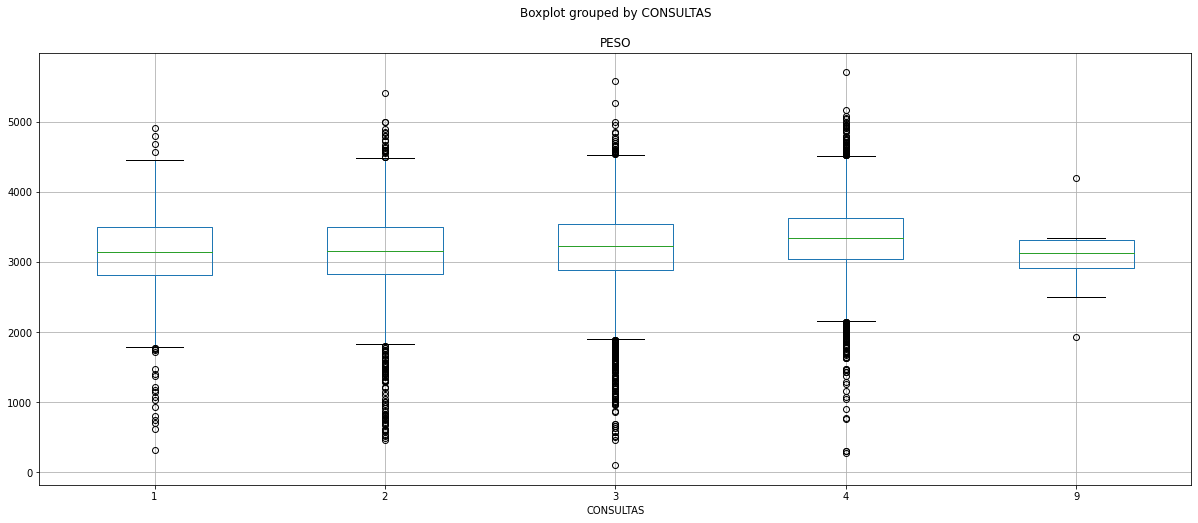

In [52]:
bp = sinasc.boxplot(column=['PESO'], by='CONSULTAS', figsize=(20,8))

In [53]:
#CORRELAÇÃO

viuvas = sinasc[sinasc.ESTCIVMAE == '3']
viuvas.corr()

,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5,PESO,SERIESCMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,SEMAGESTAC,CONSPRENAT
IDADEMAE,1.000000,0.669268,0.094680,0.167552,0.641436,-0.082412,-0.932159,0.577403,0.603700,0.222894,1.0,-0.428628,-0.227708
QTDFILVIVO,0.669268,1.000000,0.413256,0.188684,0.850823,-0.328044,-0.981981,0.971093,0.975779,-0.078598,1.0,-0.503722,-0.442638
QTDFILMORT,0.094680,0.413256,1.000000,0.232417,0.381529,-0.239798,0.327327,0.437402,0.498588,0.427121,NaN,-0.534453,-0.251981
APGAR1,0.167552,0.188684,0.232417,1.000000,0.465803,0.320371,0.327327,0.305381,0.206056,-0.183804,1.0,0.211660,0.233993
APGAR5,0.641436,0.850823,0.381529,0.465803,1.000000,-0.160738,-0.981981,0.817223,0.819342,-0.068559,1.0,-0.418759,-0.388692
PESO,-0.082412,-0.328044,-0.239798,0.320371,-0.160738,1.000000,0.087963,-0.252091,-0.211037,-0.313044,-1.0,0.651786,0.523770
SERIESCMAE,-0.932159,-0.981981,0.327327,0.327327,-0.981981,0.087963,1.000000,-0.866025,-0.981981,NaN,NaN,0.982084,-0.269061
QTDGESTANT,0.577403,0.971093,0.437402,0.305381,0.817223,-0.252091,-0.866025,1.000000,0.964339,-0.191582,1.0,-0.422636,-0.283002
QTDPARTNOR,0.603700,0.975779,0.498588,0.206056,0.819342,-0.211037,-0.981981,0.964339,1.000000,-0.251236,1.0,-0.413162,-0.515234
QTDPARTCES,0.222894,-0.078598,0.427121,-0.183804,-0.068559,-0.313044,NaN,-0.191582,-0.251236,1.000000,NaN,-0.302546,-0.003978


In [55]:
#REGRESSÃO

dados = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.GRAVIDEZ == '2') & (sinasc.PESO.notna()) &(sinasc.SEMAGESTAC.notna())]
dados[['PESO', 'SEMAGESTAC']].corr()

,PESO,SEMAGESTAC
PESO,1.000000,0.841709
SEMAGESTAC,0.841709,1.000000


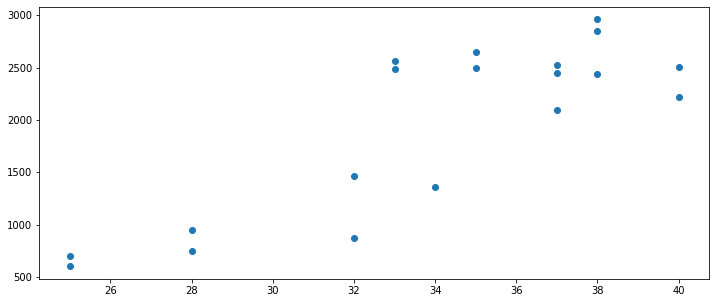

In [57]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(dados.SEMAGESTAC)
y = np.array(dados.PESO)
plt.figure(figsize=(12, 5))
plt.scatter(x, y)

In [60]:
x, y

(array([35, 35, 32, 34, 37, 37, 33, 33, 40, 40, 28, 28, 25, 25, 37, 38, 32,
        38, 38], dtype=object),
 array([2645, 2500, 868, 1362, 2520, 2095, 2490, 2565, 2505, 2215, 750,
        950, 700, 600, 2450, 2440, 1460, 2850, 2960], dtype=object))

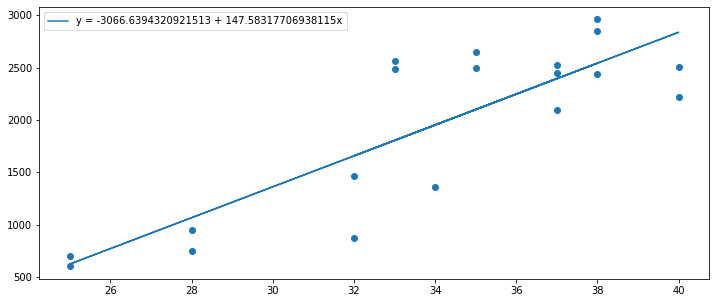

In [63]:
beta, alfa = np.polyfit(x.tolist(), y.tolist(), deg=1)
plt.figure(figsize=(12, 5))
plt.scatter(x, y)
plt.plot(x, alfa + beta* x, label=f"y = {alfa} + {beta}x")
plt.legend()

In [64]:
semanas = [35, 36, 37, 38, 39, 40]
pesos = [beta*x + alfa for x in semanas]
pesos

[2098.771765336189,
 2246.3549424055705,
 2393.9381194749517,
 2541.521296544332,
 2689.1044736137133,
 2836.6876506830945]

In [67]:
dados['PESO_ESTIMADO'] = alfa + beta * dados.SEMAGESTAC
dados['RESIDUO'] = dados.PESO - dados.PESO_ESTIMADO
dados[['PESO', 'PESO_ESTIMADO', 'RESIDUO', 'SEMAGESTAC']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PESO,PESO_ESTIMADO,RESIDUO,SEMAGESTAC
509,2645,2098.771765,546.228235,35
510,2500,2098.771765,401.228235,35
2165,868,1656.022234,-788.022234,32
2167,1362,1951.188588,-589.188588,34
3112,2520,2393.938119,126.061881,37
3113,2095,2393.938119,-298.938119,37
4077,2490,1803.605411,686.394589,33
4078,2565,1803.605411,761.394589,33
4693,2505,2836.687651,-331.687651,40
4694,2215,2836.687651,-621.687651,40


In [68]:
#exercicios

x = dados.SEMAGESTAC
y = dados.PESO
n = len(dados)
media_x = dados.SEMAGESTAC.mean()
media_y = dados.PESO.mean()


In [70]:
xy = x.mul(y)
xy = xy.sum()
xy

1311499

In [71]:
x2 = x.mul(x)
x2 = x2.sum()
x2

22289

In [72]:
num = xy - n*media_x*media_y
den = x2 - n*media_x*media_x
beta = num/den
beta

147.58317706938058

In [73]:
alfa = media_y - beta*media_x
alfa

-3066.63943209213

In [74]:
#coeficiente de determinação

sqtot = np.sum(np.square(dados.PESO - dados.PESO.mean()))
sqres = np.sum(np.square(dados.PESO - dados.PESO_ESTIMADO))
sqreg = np.sum(np.square(dados.PESO_ESTIMADO - dados.PESO.mean()))
sqtot, sqres, sqreg

(12080470.631578948, 3521764.88668631, 8558705.744892633)

In [75]:
r2 = sqreg/sqtot
r2

0.7084745293382654

In [76]:
r2_2 = 1- sqres/sqtot
r2_2

0.7084745293382658

In [ ]:
#teste de hipotese

